<a href="https://colab.research.google.com/github/sijuswamy/Python-for-Datascience/blob/main/Analysis_of_Built_in_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with datasets in dataset repositories

We can play with built-in datasets which are more well organized to understand the basic datascience operations on simple datasets.

## The classical `iris` dataset

![iris orcid](https://miro.medium.com/max/8544/0*HWeiO-tBxKeIvpVp){width=700px}


## Introduction
In this notebook, I have done the Exploratory Data Analysis of the famous Iris dataset and tried to gain useful insights from the data.
The features present in the dataset are:

1. Sepal Width
2. Sepal Length
3. Petal Width
4. Petal Length

### Importing Libraries

In [14]:
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
import warnings
warnings.filterwarnings('ignore')## turn off all warnings

## Loading dataset

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df.head()

In [ ]:
iris_df.tail()

In [18]:
iris_df.shape # shape of iris_df


(150, 5)

In [19]:
iris_df.columns#  list the column names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
iris_df.info() # information on the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Statistical Summary of the dataframe

In [21]:
iris_df.describe(include='all')


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [22]:
iris_df.describe() #Performing just for numeric columns


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking for Duplicate values


In [23]:
iris_df.duplicated().sum() # Total no of duplicates in the dataset


1

In [24]:
iris_df[iris_df.duplicated()] #This shows the actual duplicate rows


,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


## Number of samples in the categorical target class

In [25]:
iris_df['species'].value_counts()


virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

## Checking missing values
We confirmed through the info function that our dataset is free from null values but let us further justify it.

In [26]:
iris_df.isnull().sum(axis=0)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Estimating Skewness and Kurtosis


In [14]:
iris_df.skew()


sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [15]:
iris_df.kurt()


sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

## Visualisations on target column
Our target column is the species column because, in the end, we want to predict the correct species of flower.

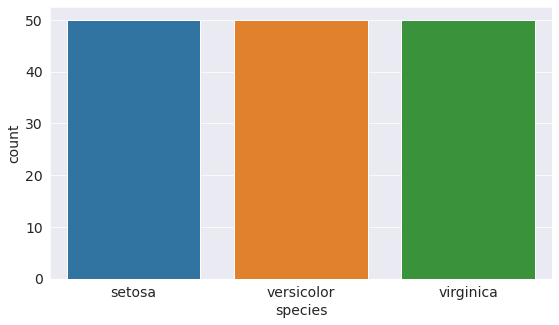

In [28]:
fig = plt.figure()
#plt.title('Species Count')
sns.countplot(iris_df['species'])
plt.show()

In [29]:
fig.savefig('Class_size.pdf')

## Visualising relations between variables
Let's compare the `sepal length` and `sepal width` columns.

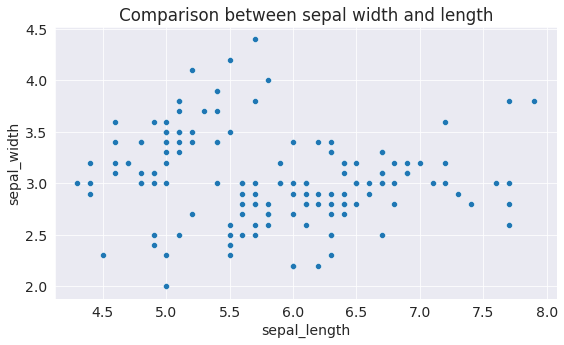

In [30]:
plt.title('Comparison between sepal width and length')
sns.scatterplot(x=iris_df['sepal_length'], y=iris_df['sepal_width']);

Let's compare them again but this time lets compare on the basis on species as well.

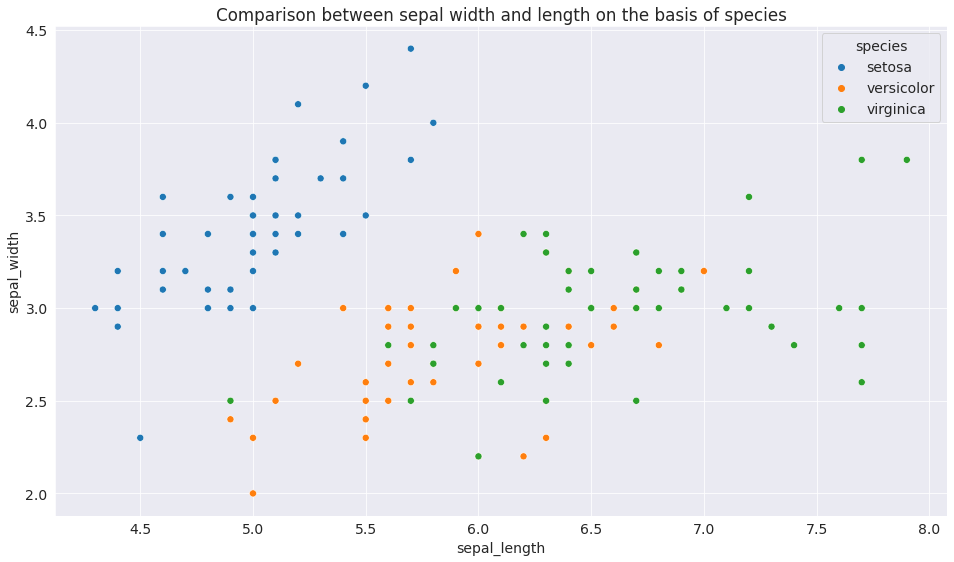

In [31]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(iris_df['sepal_length'], iris_df['sepal_width'], hue = iris_df['species'], s= 50);
plt.show()

From the above visualization, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths.

Let's compare the petal length and petal width columns.

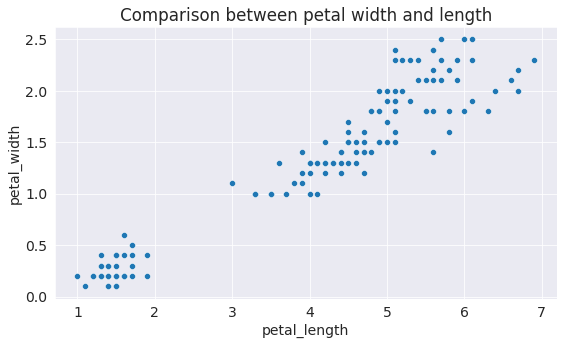

In [32]:
plt.title('Comparison between petal width and length')
sns.scatterplot(x=iris_df['petal_length'], y=iris_df['petal_width']);

We can see two separate clusters but not sure about the species so let's bring the species into the equation as well.

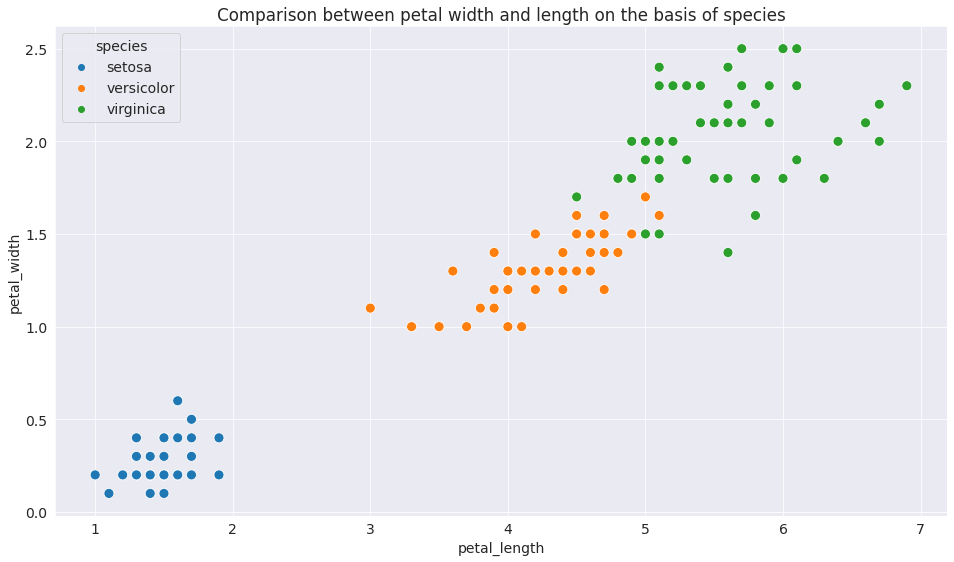

In [33]:
plt.figure(figsize=(16,9))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(x=iris_df['petal_length'], y=iris_df['petal_width'], hue = iris_df['species'], s= 100);

We see that setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width.

Now let's visualize all the columns relationship using pair plots.

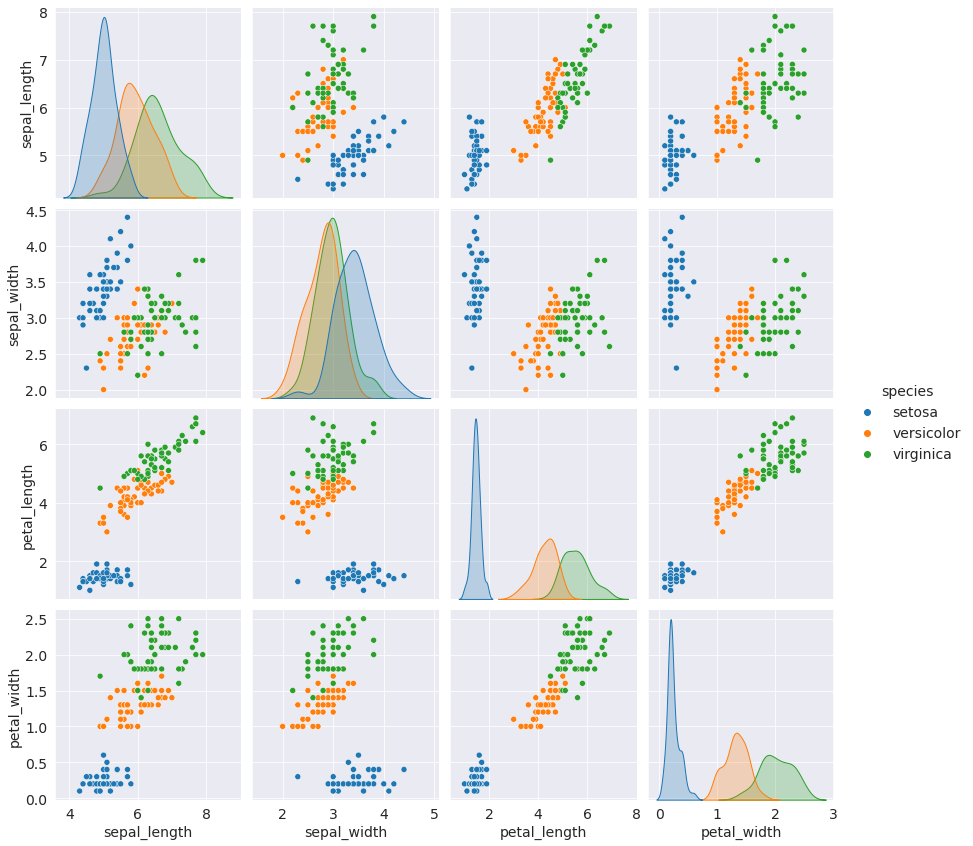

In [34]:
sns.pairplot(iris_df,hue="species",height=3);


>Observations: Pair plot represents the relationship between our target and the variables. We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or pedal. While virginica has high pedal width and length while it has small sepal width but large sepal length.

## Correlation Between Variables


In [22]:
iris_df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Further, we can visualise this correlation using a heatmap.


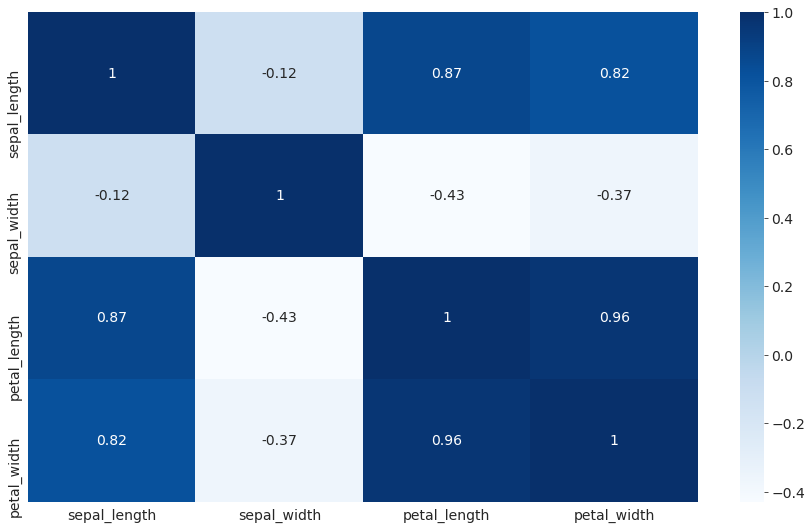

In [35]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris_df.corr(), cmap='Blues', annot = True);

From the above heatmap, we see that petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

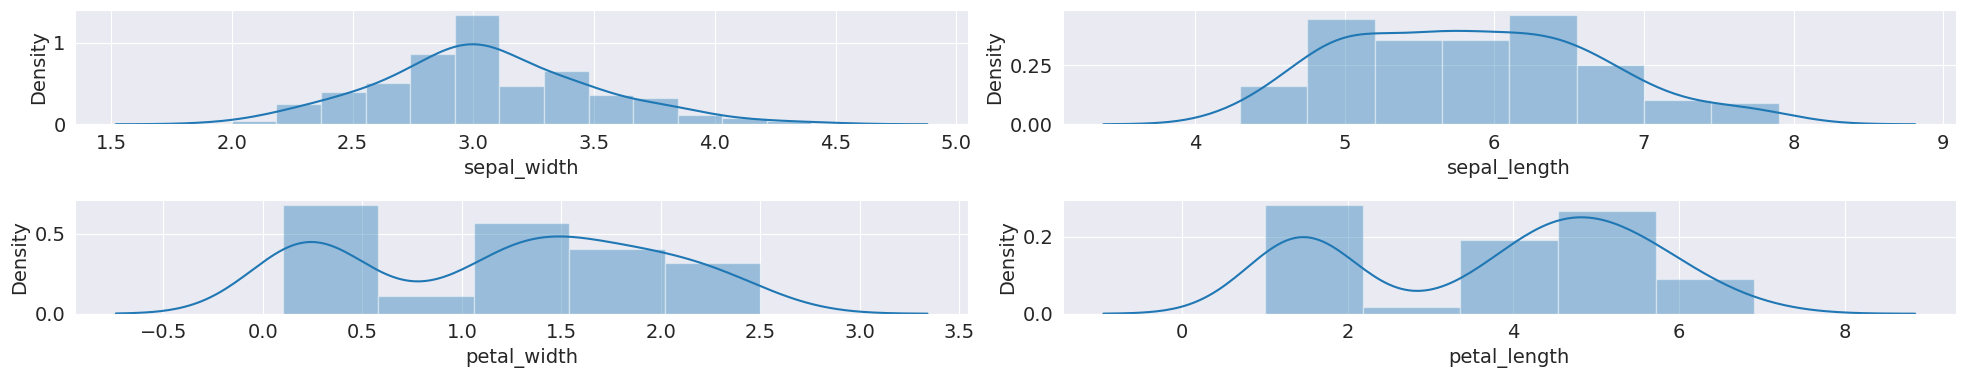

In [24]:
cols = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(2,2,i)
    sns.distplot(iris_df[col])
    i = i+1
plt.tight_layout()
plt.show()

## Histograms
Let's see the distribution of data for the various columns of our data set.

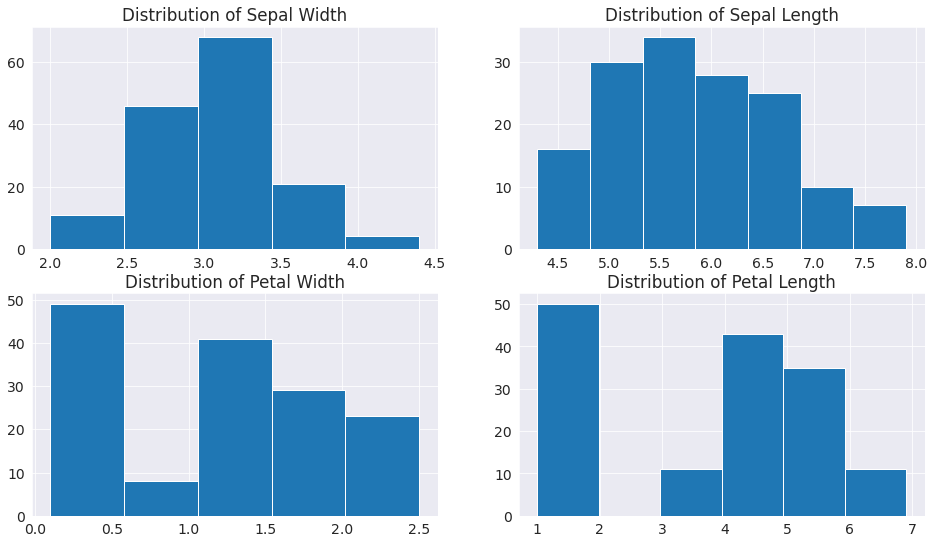

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['sepal_width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['sepal_length'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['petal_width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['petal_length'], bins=6);

## Univariate Analysis of our columns


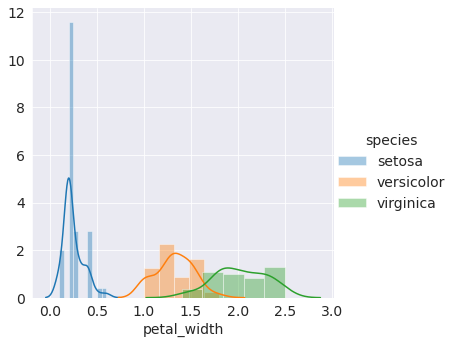

In [26]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"petal_width").add_legend();


We see the setosa is easily separable while some portions of Versicolor and virginica are mixed.

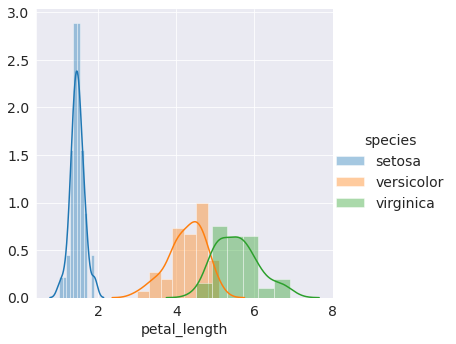

In [27]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"petal_length").add_legend();

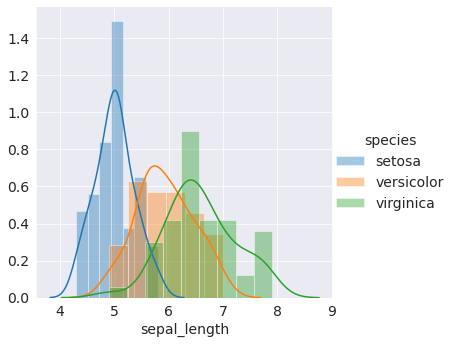

In [28]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"sepal_length").add_legend();

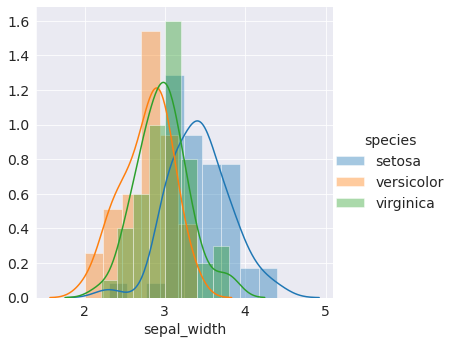

In [29]:
sns.FacetGrid(iris_df,hue="species",height=5).map(sns.distplot,"sepal_width").add_legend();

## Boxplots for visualization


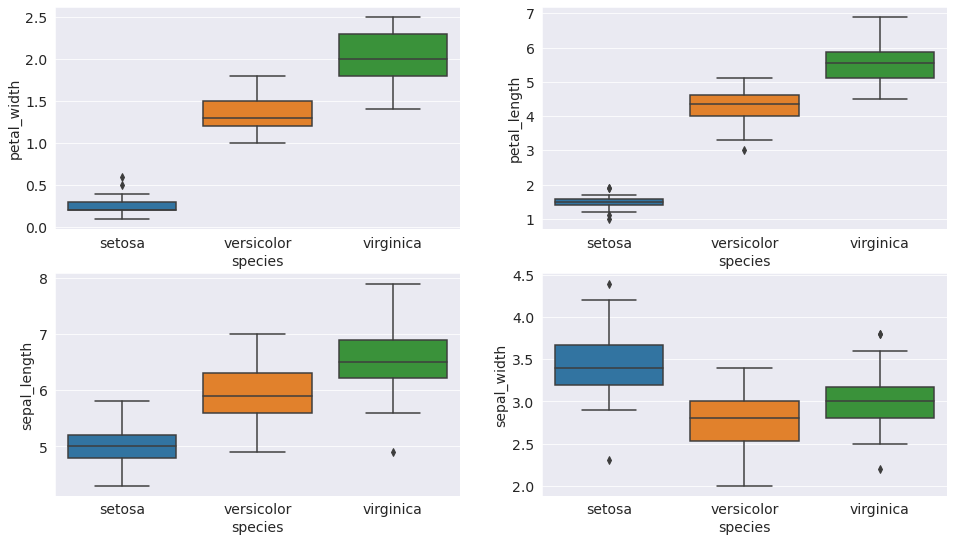

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_width", x= "species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

>Observations: Further, we see that the box plots describe that 
* The setosa usually has smaller features with few outliers.
* The Versicolor species has average features
* The virginica species has the longest features widths and lengths as compared to others.

We can further see the distributions using the violin plot on our dataset

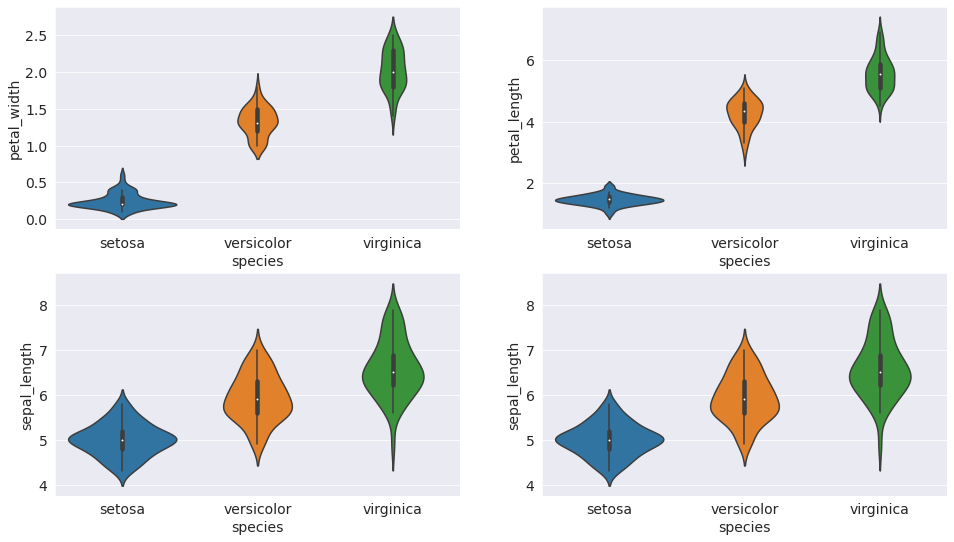

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal_width", x= "species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal_length", x= "species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal_length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal_length", x= "species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

The kernel density of the data along with the full distribution of the data is shown through the violin plots. We can see the probability density of the various features.

## Conclusion

Even the basic EDA give us deeper insight about the data and give hints for classification/ regression models on feature sets.